# Course 2 Project: ML Pipeline for Feature Engineering

## Instructions

In this project, you'll use data related to microeconomic indicators and historical stock prices to explore the data engineering pipline. You'll get to practice:

* Data ingestion 
* Data cleaning
* Data imputation
* Exploratory data analysis (EDA) through charts and graphs

## Packages

You'll use `pandas` and `matplotlib`, which were covered in the course material, to import, clean, and plot data. They have been installed in this workspace for you. If you're working locally and you installed Jupyter using Anaconda, these packages will already be installed. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

The first step in a data engineering pipeline for machine learning is to ingest the data that will be used. For this project, data is hosted on a public GitHub repo. 

### Your tasks
* Import data from the provided [GitHub repo](https://github.com/udacity/CD13649-Project/tree/main/Project) using `pandas`. For your convenience, the data files (CSVs) are also present in the current workspace at the path **CD13649-Project/Project/**. Here are the data files to import: 
  1. GDP (**GDP.csv**)
  2. Inflation (**inflation_monthly.csv**)
  3. Apple stock prices (**apple_historical_data.csv**)
  4. Microsoft stock prices (**microsoft_historical_data.csv**)
  5. Consumer price index (**consumer_price_index.csv**)



* Verify that the data has been imported correctly into `pandas` dataframes. Use methods like `head()` and `info()`


* You may need to change column names to make them easier to work with


* You may need to cast datetime data to the `datetime` format using `pandas` `to_datetime()` method



In [2]:
!ls

GDP.csv
Preparing-for-data-analysis-project-student.ipynb
apple_3_mnths.csv
apple_historical_data.csv
consumer_price_index.csv
gdp.csv
inflation_monthly.csv
microsoft_historical_data.csv
readme.md
returns.csv
returns_apple.csv
returns_inflation.csv
returns_microsoft.csv


In [3]:
!pip install fsspec


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [4]:
# Load historical GDP data
gdp = pd.read_csv("https://github.com/udacity/CD13649-Project/blob/main/Project/GDP.csv?raw=true")


In [5]:
# Check the first few rows of data
gdp.head()

,DATE,GDP
0,1947-01-01,243.164
1,1947-04-01,245.968
2,1947-07-01,249.585
3,1947-10-01,259.745
4,1948-01-01,265.742


In [6]:
# Load the historical stock price data for Apple and Microsoft
apple = pd.read_csv("https://github.com/udacity/CD13649-Project/blob/main/Project/apple_historical_data.csv?raw=true",)
mst = pd.read_csv("https://github.com/udacity/CD13649-Project/blob/main/Project/microsoft_historical_data.csv?raw=true")

In [7]:
# Check the first few rows of data
apple.head()



,Date,Close/Last,Volume,Open,High,Low
0,5/3/2024,$183.38,163224100,$186.65,$187.00,$182.66
1,5/2/2024,$173.03,94214920,$172.51,$173.42,$170.89
2,5/1/2024,$169.30,50383150,$169.58,$172.71,$169.11
3,4/30/2024,$170.33,65934780,$173.33,$174.99,$170.00
4,4/29/2024,$173.50,68169420,$173.37,$176.03,$173.10


In [8]:
mst.head()

,Date,Close/Last,Volume,Open,High,Low
0,05/03/2024,$406.66,17446720,$402.28,$407.15,$401.86
1,05/02/2024,$397.84,17709360,$397.66,$399.93,$394.6515
2,05/01/2024,$394.94,23562480,$392.61,$401.7199,$390.31
3,04/30/2024,$389.33,28781370,$401.49,$402.16,$389.17
4,04/29/2024,$402.25,19582090,$405.25,$406.32,$399.19


In [9]:
# Use methods like .info() and .describe() to explore the data


In [10]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        2517 non-null   object
 1   Close/Last  2514 non-null   object
 2   Volume      2517 non-null   int64 
 3   Open        2517 non-null   object
 4   High        2517 non-null   object
 5   Low         2517 non-null   object
dtypes: int64(1), object(5)
memory usage: 118.1+ KB


In [11]:
mst.head()

,Date,Close/Last,Volume,Open,High,Low
0,05/03/2024,$406.66,17446720,$402.28,$407.15,$401.86
1,05/02/2024,$397.84,17709360,$397.66,$399.93,$394.6515
2,05/01/2024,$394.94,23562480,$392.61,$401.7199,$390.31
3,04/30/2024,$389.33,28781370,$401.49,$402.16,$389.17
4,04/29/2024,$402.25,19582090,$405.25,$406.32,$399.19


## Data preprocessing: Check for missing data and forward fill

Check the Apple historical prices for missing data. Check for missing data in all columns. If there's data missing, use a forward fill to fill in those missing prices. 

In [12]:
# Check for nulls 
#number of Nans per column
apple.isna().sum()


Date          0
Close/Last    3
Volume        0
Open          0
High          0
Low           0
dtype: int64

In [13]:
# Forward fill any missing data
apple = apple.ffill()

In [14]:
# Check again for nulls after using forward fill
apple.isna().sum()

Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64

In [15]:
mst.isna().sum()

Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64

## Data preprocessing: Remove special characters and convert to numeric/datetime

The next step in the data engineering process is to standardize and clean up data. In this step, you'll check for odd formatting and special characters that will make it difficult to work with data as numeric or datetime. 

In this step:
* Create a function that takes in a dataframe and a list of columns and removes dollar signs ('$') from those columns
* Convert any columns with date/time data into a `pandas` `datetime` format

In [16]:
def convert_dollar_columns_to_numeric(df, numeric_columns):
    '''
        Removes dollar signs ('$') from a list of columns in a given dataframe AND casts the columns to a numeric datatype.
        Updates dataframe IN PLACE.
        
        Inputs:
            df: dataframe to be operated on
            numeric_columns: columns that should have numeric data but have dollar signs currently
            
        Returns:
            None - changes to the dataframe can be made in place
    '''
    
    
    for col in numeric_columns:
        df[col] = df[col].str.replace("$","")
        df[col] = pd.to_numeric(df[col])
    

In [17]:
# Use convert_dollar_columns_to_numeric() to remove the dollar sign from the Apple and Microsoft datasets

convert_dollar_columns_to_numeric(apple, ['Close/Last', 'Open', 'High', 'Low'])

### Microsoft data preprocessing 

In [18]:
mst

,Date,Close/Last,Volume,Open,High,Low
0,05/03/2024,$406.66,17446720,$402.28,$407.15,$401.86
1,05/02/2024,$397.84,17709360,$397.66,$399.93,$394.6515
2,05/01/2024,$394.94,23562480,$392.61,$401.7199,$390.31
3,04/30/2024,$389.33,28781370,$401.49,$402.16,$389.17
4,04/29/2024,$402.25,19582090,$405.25,$406.32,$399.19
...,...,...,...,...,...,...
2512,05/12/2014,$39.97,22761620,$39.74,$40.02,$39.65
2513,05/09/2014,$39.54,29646100,$39.54,$39.85,$39.37
2514,05/08/2014,$39.64,32089010,$39.34,$39.90,$38.97
2515,05/07/2014,$39.425,41731030,$39.22,$39.51,$38.51


In [19]:
convert_dollar_columns_to_numeric(mst, ['Close/Last', 'Open', 'High', 'Low'])

In [20]:
mst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2517 non-null   object 
 1   Close/Last  2517 non-null   float64
 2   Volume      2517 non-null   int64  
 3   Open        2517 non-null   float64
 4   High        2517 non-null   float64
 5   Low         2517 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 118.1+ KB


In [21]:
# Use pandas's to_datetime() to convert any columns that are in a datetime format

mst["Date"] = pd.to_datetime(mst["Date"])
mst

,Date,Close/Last,Volume,Open,High,Low
0,2024-05-03,406.660,17446720,402.28,407.1500,401.8600
1,2024-05-02,397.840,17709360,397.66,399.9300,394.6515
2,2024-05-01,394.940,23562480,392.61,401.7199,390.3100
3,2024-04-30,389.330,28781370,401.49,402.1600,389.1700
4,2024-04-29,402.250,19582090,405.25,406.3200,399.1900
...,...,...,...,...,...,...
2512,2014-05-12,39.970,22761620,39.74,40.0200,39.6500
2513,2014-05-09,39.540,29646100,39.54,39.8500,39.3700
2514,2014-05-08,39.640,32089010,39.34,39.9000,38.9700
2515,2014-05-07,39.425,41731030,39.22,39.5100,38.5100


In [22]:
# Use .info() and check the type of each column to ensure that the above steps worked

mst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2517 non-null   datetime64[ns]
 1   Close/Last  2517 non-null   float64       
 2   Volume      2517 non-null   int64         
 3   Open        2517 non-null   float64       
 4   High        2517 non-null   float64       
 5   Low         2517 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 118.1 KB


In [23]:
# set the date as index
mst.set_index("Date", inplace = True )
mst

,Close/Last,Volume,Open,High,Low
Date,,,,,
2024-05-03,406.660,17446720,402.28,407.1500,401.8600
2024-05-02,397.840,17709360,397.66,399.9300,394.6515
2024-05-01,394.940,23562480,392.61,401.7199,390.3100
2024-04-30,389.330,28781370,401.49,402.1600,389.1700
2024-04-29,402.250,19582090,405.25,406.3200,399.1900
...,...,...,...,...,...
2014-05-12,39.970,22761620,39.74,40.0200,39.6500
2014-05-09,39.540,29646100,39.54,39.8500,39.3700
2014-05-08,39.640,32089010,39.34,39.9000,38.9700


In [24]:
mst = mst.sort_index()
mst

,Close/Last,Volume,Open,High,Low
Date,,,,,
2014-05-06,39.060,27105700,39.29,39.3500,38.9500
2014-05-07,39.425,41731030,39.22,39.5100,38.5100
2014-05-08,39.640,32089010,39.34,39.9000,38.9700
2014-05-09,39.540,29646100,39.54,39.8500,39.3700
2014-05-12,39.970,22761620,39.74,40.0200,39.6500
...,...,...,...,...,...
2024-04-29,402.250,19582090,405.25,406.3200,399.1900
2024-04-30,389.330,28781370,401.49,402.1600,389.1700
2024-05-01,394.940,23562480,392.61,401.7199,390.3100


## Data preprocessing: Align datetime data

Data engineering includes changing data with a datetime component if needed so that different time series can be more easily compared or plotted against each other. 

In this step:

* Align the inflation date so that it falls on the last day of the month instead of the first

Helpful hints: 
* Use the `pandas` `offsets` method using `MonthEnd(0)` to set the 'Date' column to month-end

In [25]:
# Align inflation data so that the date is the month end (e.g. Jan 31, Feb 28/28)

inflation = pd.read_csv("https://github.com/udacity/CD13649-Project/blob/main/Project/inflation_monthly.csv?raw=true")
inflation

,DATE,CORESTICKM159SFRBATL
0,1968-01-01,3.651861
1,1968-02-01,3.673819
2,1968-03-01,4.142164
3,1968-04-01,4.155828
4,1968-05-01,4.088245
...,...,...
670,2023-11-01,4.688293
671,2023-12-01,4.554396
672,2024-01-01,4.603922
673,2024-02-01,4.403102


In [26]:
inflation["DATE"] = pd.to_datetime(inflation["DATE"])

In [27]:
inflation

,DATE,CORESTICKM159SFRBATL
0,1968-01-01,3.651861
1,1968-02-01,3.673819
2,1968-03-01,4.142164
3,1968-04-01,4.155828
4,1968-05-01,4.088245
...,...,...
670,2023-11-01,4.688293
671,2023-12-01,4.554396
672,2024-01-01,4.603922
673,2024-02-01,4.403102


In [28]:
inflation["DATE"] =  inflation["DATE"]+ pd.offsets.MonthEnd(0)

In [29]:
inflation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   DATE                  675 non-null    datetime64[ns]
 1   CORESTICKM159SFRBATL  675 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 10.7 KB


In [30]:
inflation.index

RangeIndex(start=0, stop=675, step=1)

In [31]:
inflation.set_index("DATE",inplace = True)

In [32]:
inflation = inflation.sort_index()

In [33]:
inflation

,CORESTICKM159SFRBATL
DATE,
1968-01-31,3.651861
1968-02-29,3.673819
1968-03-31,4.142164
1968-04-30,4.155828
1968-05-31,4.088245
...,...
2023-11-30,4.688293
2023-12-31,4.554396
2024-01-31,4.603922


## Data preprocessing: Upsample, downsample and interpolate data

Inflation data is presented monthly in this dataset. However, for some models, you may need it at a quarterly frequency, and for some models you may need it at a quarterly frequency. 

In this step:
* Create a new quarterly inflation dataframe by downsampling the monthly inflation data to quarterly using the mean (e.g. for quarter 1 in a given year, use the average values from January, February, and March)
* Create a new weekly inflation dataframe by upsampling the monthly inflation data. For this, you'll need to use `resample` and then you'll need to `interpolate` to fill in the missing data at the weekly frequency

Note that you may need to change the index for some of these operations! 

In [34]:
# Upsample and interpolate from monthly to weekly 
w_inflation = inflation.resample("W").interpolate()
w_inflation.shape

(2931, 1)

In [35]:
w_inflation.head(10)

,CORESTICKM159SFRBATL
DATE,
1968-02-04,NaN
1968-02-11,NaN
1968-02-18,NaN
1968-02-25,NaN
1968-03-03,NaN
1968-03-10,NaN
1968-03-17,NaN
1968-03-24,NaN
1968-03-31,4.142164


In [36]:
inflation.shape

(675, 1)

In [37]:
# Downsample from monthly to quarterly 

q_inflation = inflation.resample("QE").mean()
q_inflation.shape

(225, 1)

In [38]:
q_inflation

,CORESTICKM159SFRBATL
DATE,
1968-03-31,3.822615
1968-06-30,4.263214
1968-09-30,4.882643
1968-12-31,5.429443
1969-03-31,5.873770
...,...
2023-03-31,6.467833
2023-06-30,5.942054
2023-09-30,5.179249


## Data preprocessing: Normalize/standardize a feature

Economic time series data often involve variables measured on different scales (e.g., GDP in trillions of dollars, inflation in percentage points). Standardizing these variables (typically by subtracting the mean and dividing by the standard deviation) puts them on a common scale, allowing for meaningful comparisons and analyses.

Your task:
* Standardize the GDP data. You may do this manually by subtracting the mean and dividing by the standard deviation, or you may use a built-in method from a library like `sklearn`'s `StandardScaler`

In [39]:
gdp

,DATE,GDP
0,1947-01-01,243.164
1,1947-04-01,245.968
2,1947-07-01,249.585
3,1947-10-01,259.745
4,1948-01-01,265.742
...,...,...
304,2023-01-01,26813.601
305,2023-04-01,27063.012
306,2023-07-01,27610.128
307,2023-10-01,27956.998


In [40]:
# Standardize the GDP measure
gdp_scaled = (gdp["GDP"] - gdp["GDP"].mean())/gdp["GDP"].std()
gdp_scaled


0     -0.933981
1     -0.933606
2     -0.933123
3     -0.931764
4     -0.930962
         ...   
304    2.619025
305    2.652376
306    2.725536
307    2.771920
308    2.815713
Name: GDP, Length: 309, dtype: float64

In [41]:
gdp["GDP"] = gdp_scaled

In [42]:
# Check the dataframe to make sure the calculation worked as expected 

gdp

,DATE,GDP
0,1947-01-01,-0.933981
1,1947-04-01,-0.933606
2,1947-07-01,-0.933123
3,1947-10-01,-0.931764
4,1948-01-01,-0.930962
...,...,...
304,2023-01-01,2.619025
305,2023-04-01,2.652376
306,2023-07-01,2.725536
307,2023-10-01,2.771920


## EDA: Plotting a time series of adjusted open vs close price

As part of your EDA, you'll frequently want to plot two time series on the same graph and using the same axis to compare their movements. 

Your task:
* Plot the Apple open and close price time series on the same chart **for the last three months only**. Be sure to use a legend to label each line

**NOTE**: This is a large dataset. If you try to plot the entire series, your graph will be hard to interpret and may take a long time to plot. Be sure to use only the most recent three months of data. 

In [43]:
apple

,Date,Close/Last,Volume,Open,High,Low
0,5/3/2024,183.38,163224100,186.65,187.00,182.66
1,5/2/2024,173.03,94214920,172.51,173.42,170.89
2,5/1/2024,169.30,50383150,169.58,172.71,169.11
3,4/30/2024,170.33,65934780,173.33,174.99,170.00
4,4/29/2024,173.50,68169420,173.37,176.03,173.10
...,...,...,...,...,...,...
2512,5/12/2014,21.17,212736019,20.98,21.20,20.98
2513,5/9/2014,20.91,291068564,20.88,20.94,20.73
2514,5/8/2014,21.00,228973884,21.01,21.23,20.94
2515,5/7/2014,21.15,282128727,21.26,21.33,20.99


In [44]:
apple.index

RangeIndex(start=0, stop=2517, step=1)

In [45]:
apple["Date"] = pd.to_datetime(apple["Date"])
apple

,Date,Close/Last,Volume,Open,High,Low
0,2024-05-03,183.38,163224100,186.65,187.00,182.66
1,2024-05-02,173.03,94214920,172.51,173.42,170.89
2,2024-05-01,169.30,50383150,169.58,172.71,169.11
3,2024-04-30,170.33,65934780,173.33,174.99,170.00
4,2024-04-29,173.50,68169420,173.37,176.03,173.10
...,...,...,...,...,...,...
2512,2014-05-12,21.17,212736019,20.98,21.20,20.98
2513,2014-05-09,20.91,291068564,20.88,20.94,20.73
2514,2014-05-08,21.00,228973884,21.01,21.23,20.94
2515,2014-05-07,21.15,282128727,21.26,21.33,20.99


In [46]:
# set index as the date 
apple.set_index("Date", inplace = True )

In [47]:
apple = apple.sort_index()

In [48]:
apple

,Close/Last,Volume,Open,High,Low
Date,,,,,
2014-05-06,21.23,373872650,21.49,21.59,21.23
2014-05-07,21.15,282128727,21.26,21.33,20.99
2014-05-08,21.00,228973884,21.01,21.23,20.94
2014-05-09,20.91,291068564,20.88,20.94,20.73
2014-05-12,21.17,212736019,20.98,21.20,20.98
...,...,...,...,...,...
2024-04-29,173.50,68169420,173.37,176.03,173.10
2024-04-30,170.33,65934780,173.33,174.99,170.00
2024-05-01,169.30,50383150,169.58,172.71,169.11


In [49]:
# Get max date in timeseries
max_date = apple.index.max()
max_date


Timestamp('2024-05-03 00:00:00')

In [50]:
apple

,Close/Last,Volume,Open,High,Low
Date,,,,,
2014-05-06,21.23,373872650,21.49,21.59,21.23
2014-05-07,21.15,282128727,21.26,21.33,20.99
2014-05-08,21.00,228973884,21.01,21.23,20.94
2014-05-09,20.91,291068564,20.88,20.94,20.73
2014-05-12,21.17,212736019,20.98,21.20,20.98
...,...,...,...,...,...
2024-04-29,173.50,68169420,173.37,176.03,173.10
2024-04-30,170.33,65934780,173.33,174.99,170.00
2024-05-01,169.30,50383150,169.58,172.71,169.11


### Getting the last Three Months of Data

In [51]:
from pandas.tseries.offsets import DateOffset

In [52]:
# 3 months ago of max date

date = apple.index.max() - DateOffset(months = 3)
date

Timestamp('2024-02-03 00:00:00')

In [53]:
# create a mask of dates above 'date'
mask =apple.index[apple.index >= date] 
mask

DatetimeIndex(['2024-02-05', '2024-02-06', '2024-02-07', '2024-02-08',
               '2024-02-09', '2024-02-12', '2024-02-13', '2024-02-14',
               '2024-02-15', '2024-02-16', '2024-02-20', '2024-02-21',
               '2024-02-22', '2024-02-23', '2024-02-26', '2024-02-27',
               '2024-02-28', '2024-02-29', '2024-03-01', '2024-03-04',
               '2024-03-05', '2024-03-06', '2024-03-07', '2024-03-08',
               '2024-03-11', '2024-03-12', '2024-03-13', '2024-03-14',
               '2024-03-15', '2024-03-18', '2024-03-19', '2024-03-20',
               '2024-03-21', '2024-03-22', '2024-03-25', '2024-03-26',
               '2024-03-27', '2024-03-28', '2024-04-01', '2024-04-02',
               '2024-04-03', '2024-04-04', '2024-04-05', '2024-04-08',
               '2024-04-09', '2024-04-10', '2024-04-11', '2024-04-12',
               '2024-04-15', '2024-04-16', '2024-04-17', '2024-04-18',
               '2024-04-19', '2024-04-22', '2024-04-23', '2024-04-24',
      

In [54]:
# Use the max date calculated above to get the last three months of data in the dataset 
apple_3_mnths = apple.loc[mask]
apple_3_mnths.index.min(), apple.index.max()


(Timestamp('2024-02-05 00:00:00'), Timestamp('2024-05-03 00:00:00'))

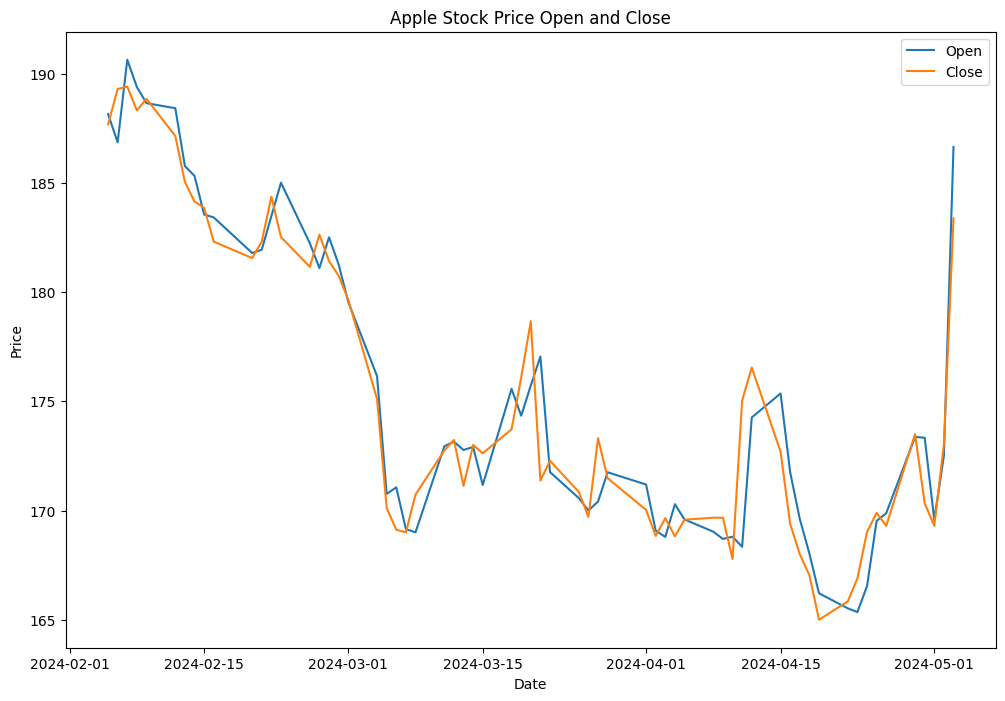

In [55]:
fig = plt.figure(figsize = (12,8))

# line chart of open prices
plt.plot(apple_3_mnths.index,  apple_3_mnths["Open"], label = "Open")
# line chart of close prices
plt.plot(apple_3_mnths.index, apple_3_mnths["Close/Last"], label = "Close")

# add title 
plt.title("Apple Stock Price Open and Close")

plt.xlabel("Date")
plt.ylabel("Price")

plt.legend()

plt.show()

## EDA: Plotting a histogram of a stock's closing price in the last three months

One way to see how much a stock's price generally moves is to plot the frequency of closing prices over a set time period. 

Your task:
* Use the **last three months** of Apple stock data and plot a histogram of closing price

In [56]:
import seaborn as sns 

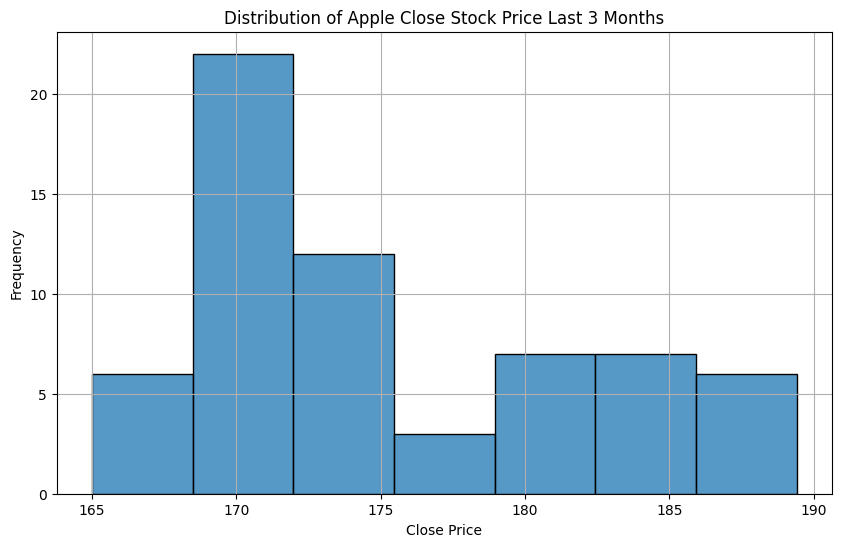

In [57]:
# Plot the histogram of Apple's closing price over the last 3 months 
plt.figure(figsize=(10, 6))

sns.histplot(data = apple_3_mnths,
            x = "Close/Last",
            #stat = "probability"
            )
plt.title("Distribution of Apple Close Stock Price Last 3 Months")
plt.xlabel("Close Price")
plt.ylabel("Frequency")

plt.grid(True)
plt.show()

## Calculating correlation between a stock price and a macroeconomic variable 

Inflation affects the purchasing power of money and can influence corporate profits, interest rates, and consumer behavior. By analyzing the correlation between stock prices and inflation, one can gauge how inflationary trends impact stock market performance. For instance, high inflation might erode profit margins and reduce stock prices, while moderate inflation might indicate a growing economy, benefiting stocks.

Your task:
* Plot a heatmap that shows the correlation between Microsoft and Apple returns and inflation 

This will require several steps:
1. Calculate the returns for Apple and Microsoft and the change in monthly inflation (use the `pct_change` method for each)
2. Interpolate the daily stock returns data to monthly so it can be compared to the monthly inflation data
3. Merge the stock returns (Apple and Microsoft) and inflation data series into a single dataframe
4. Calculate the correlation matrix between the Apple returns, Microsoft returns, and inflation change
5. Plot the correlation matrix as a heatmap

### 1. Calculate returns for Microsoft / Apple and the monthly change in inflation

In [58]:
# Calculate daily returns for Apple and Microsoft and the percent change in inflation from month to month
r_apple = apple.pct_change() 
r_apple


,Close/Last,Volume,Open,High,Low
Date,,,,,
2014-05-06,NaN,NaN,NaN,NaN,NaN
2014-05-07,-0.003768,-0.245388,-0.010703,-0.012043,-0.011305
2014-05-08,-0.007092,-0.188406,-0.011759,-0.004688,-0.002382
2014-05-09,-0.004286,0.271187,-0.006188,-0.013660,-0.010029
2014-05-12,0.012434,-0.269121,0.004789,0.012416,0.012060
...,...,...,...,...,...
2024-04-29,0.024808,0.520337,0.020544,0.027372,0.023171
2024-04-30,-0.018271,-0.032781,-0.000231,-0.005908,-0.017909
2024-05-01,-0.006047,-0.235864,-0.021635,-0.013029,-0.005235


In [59]:
r_apple = r_apple.dropna()
r_apple

,Close/Last,Volume,Open,High,Low
Date,,,,,
2014-05-07,-0.003768,-0.245388,-0.010703,-0.012043,-0.011305
2014-05-08,-0.007092,-0.188406,-0.011759,-0.004688,-0.002382
2014-05-09,-0.004286,0.271187,-0.006188,-0.013660,-0.010029
2014-05-12,0.012434,-0.269121,0.004789,0.012416,0.012060
2014-05-13,0.001889,-0.250630,0.007626,0.001415,0.005720
...,...,...,...,...,...
2024-04-29,0.024808,0.520337,0.020544,0.027372,0.023171
2024-04-30,-0.018271,-0.032781,-0.000231,-0.005908,-0.017909
2024-05-01,-0.006047,-0.235864,-0.021635,-0.013029,-0.005235


In [60]:
# microsoft returns 
r_mst = mst.pct_change()
r_mst

,Close/Last,Volume,Open,High,Low
Date,,,,,
2014-05-06,NaN,NaN,NaN,NaN,NaN
2014-05-07,0.009345,0.539567,-0.001782,0.004066,-0.011297
2014-05-08,0.005453,-0.231052,0.003060,0.009871,0.011945
2014-05-09,-0.002523,-0.076129,0.005084,-0.001253,0.010264
2014-05-12,0.010875,-0.232222,0.005058,0.004266,0.007112
...,...,...,...,...,...
2024-04-29,-0.010017,-0.340552,-0.016789,-0.016174,-0.016192
2024-04-30,-0.032119,0.469780,-0.009278,-0.010238,-0.025101
2024-05-01,0.014409,-0.181329,-0.022118,-0.001094,0.002929


In [61]:
# remove nans
r_mst = r_mst.dropna() 
r_mst

,Close/Last,Volume,Open,High,Low
Date,,,,,
2014-05-07,0.009345,0.539567,-0.001782,0.004066,-0.011297
2014-05-08,0.005453,-0.231052,0.003060,0.009871,0.011945
2014-05-09,-0.002523,-0.076129,0.005084,-0.001253,0.010264
2014-05-12,0.010875,-0.232222,0.005058,0.004266,0.007112
2014-05-13,0.011258,0.185945,0.004529,0.011994,0.005044
...,...,...,...,...,...
2024-04-29,-0.010017,-0.340552,-0.016789,-0.016174,-0.016192
2024-04-30,-0.032119,0.469780,-0.009278,-0.010238,-0.025101
2024-05-01,0.014409,-0.181329,-0.022118,-0.001094,0.002929


In [62]:
# "returns" of inflation 
r_inflation = inflation.pct_change()
r_inflation

,CORESTICKM159SFRBATL
DATE,
1968-01-31,NaN
1968-02-29,0.006013
1968-03-31,0.127482
1968-04-30,0.003299
1968-05-31,-0.016262
...,...
2023-11-30,-0.039860
2023-12-31,-0.028560
2024-01-31,0.010874


In [63]:
r_inflation = r_inflation.dropna()
r_inflation 

,CORESTICKM159SFRBATL
DATE,
1968-02-29,0.006013
1968-03-31,0.127482
1968-04-30,0.003299
1968-05-31,-0.016262
1968-06-30,0.111863
...,...
2023-11-30,-0.039860
2023-12-31,-0.028560
2024-01-31,0.010874


### 2. Interpolate stock returns from daily to monthly

Use compounding 

In [64]:
import numpy as np 

In [65]:
r_apple.index

DatetimeIndex(['2014-05-07', '2014-05-08', '2014-05-09', '2014-05-12',
               '2014-05-13', '2014-05-14', '2014-05-15', '2014-05-16',
               '2014-05-19', '2014-05-20',
               ...
               '2024-04-22', '2024-04-23', '2024-04-24', '2024-04-25',
               '2024-04-26', '2024-04-29', '2024-04-30', '2024-05-01',
               '2024-05-02', '2024-05-03'],
              dtype='datetime64[ns]', name='Date', length=2516, freq=None)

In [66]:
# apple monthly returns 
m_r_apple  =  (1 + r_apple).resample("ME").prod() -1 
m_r_apple

,Close/Last,Volume,Open,High,Low
Date,,,,,
2014-05-31,0.065002,0.507038,0.060493,0.065771,0.057937
2014-06-30,0.027421,-0.648770,0.010531,0.018253,0.024933
2014-07-31,0.028842,0.144544,0.054711,0.039693,0.035187
2014-08-31,0.072385,-0.213849,0.058872,0.056240,0.072178
2014-09-30,-0.017167,0.238203,-0.020218,-0.013214,-0.016438
...,...,...,...,...,...
2024-01-31,-0.042227,0.299860,-0.035379,-0.037551,-0.038492
2024-02-29,-0.019794,1.464179,-0.030849,-0.024212,-0.026146
2024-03-31,-0.051286,-0.519524,-0.052518,-0.056636,-0.050242


In [67]:
# microsoft monthly returns 
m_r_mst =(1 + r_mst).resample("ME").prod()-1
m_r_mst

,Close/Last,Volume,Open,High,Low
Date,,,,,
2014-05-31,0.048131,0.275170,0.029524,0.041169,0.033376
2014-06-30,0.018564,-0.109190,0.042522,0.030266,0.036025
2014-07-31,0.035012,0.023948,0.028693,0.035063,0.033094
2014-08-31,0.052595,-0.315587,0.039419,0.040055,0.041202
2014-09-30,0.020471,0.529192,0.028388,0.022806,0.025750
...,...,...,...,...,...
2024-01-31,0.057281,1.555737,0.082340,0.101177,0.063538
2024-02-29,0.040394,-0.332640,0.004128,-0.002697,0.021928
2024-03-31,0.017116,-0.315398,0.030149,0.018518,0.032519


In [68]:
# select close column and rename it to apple
apple_close = m_r_apple[["Close/Last"]]
apple_close = apple_close.rename(columns = {"Close/Last":"apple"})
apple_close

,apple
Date,
2014-05-31,0.065002
2014-06-30,0.027421
2014-07-31,0.028842
2014-08-31,0.072385
2014-09-30,-0.017167
...,...
2024-01-31,-0.042227
2024-02-29,-0.019794
2024-03-31,-0.051286


In [69]:
mst_close = m_r_mst[["Close/Last"]]
mst_close =  mst_close.rename(columns = {"Close/Last": "microsoft"})
mst_close

,microsoft
Date,
2014-05-31,0.048131
2014-06-30,0.018564
2014-07-31,0.035012
2014-08-31,0.052595
2014-09-30,0.020471
...,...
2024-01-31,0.057281
2024-02-29,0.040394
2024-03-31,0.017116


In [70]:
r_inflation

,CORESTICKM159SFRBATL
DATE,
1968-02-29,0.006013
1968-03-31,0.127482
1968-04-30,0.003299
1968-05-31,-0.016262
1968-06-30,0.111863
...,...
2023-11-30,-0.039860
2023-12-31,-0.028560
2024-01-31,0.010874


In [71]:
r_inflation = r_inflation.rename(columns = {"CORESTICKM159SFRBATL":"inflation"})
r_inflation

,inflation
DATE,
1968-02-29,0.006013
1968-03-31,0.127482
1968-04-30,0.003299
1968-05-31,-0.016262
1968-06-30,0.111863
...,...
2023-11-30,-0.039860
2023-12-31,-0.028560
2024-01-31,0.010874


In [72]:
# get min and max date for each dataframe
apple_close.index.min(),apple_close.index.max(),mst_close.index.min(),mst_close.index.max(),r_inflation.index.min(),r_inflation.index.max()

(Timestamp('2014-05-31 00:00:00'),
 Timestamp('2024-05-31 00:00:00'),
 Timestamp('2014-05-31 00:00:00'),
 Timestamp('2024-05-31 00:00:00'),
 Timestamp('1968-02-29 00:00:00'),
 Timestamp('2024-03-31 00:00:00'))

In [73]:
r_inflation

,inflation
DATE,
1968-02-29,0.006013
1968-03-31,0.127482
1968-04-30,0.003299
1968-05-31,-0.016262
1968-06-30,0.111863
...,...
2023-11-30,-0.039860
2023-12-31,-0.028560
2024-01-31,0.010874


### Join the dataframes using the index

In [74]:
dfs = [apple_close,mst_close,r_inflation]

# convert dates from YYYY-mm-dd to YYYY-mm
dfs_monthly = [df.set_index(df.index.to_period("M")) for df in dfs]
dfs_monthly[0]

,apple
Date,
2014-05,0.065002
2014-06,0.027421
2014-07,0.028842
2014-08,0.072385
2014-09,-0.017167
...,...
2024-01,-0.042227
2024-02,-0.019794
2024-03,-0.051286


In [75]:
inflation

,CORESTICKM159SFRBATL
DATE,
1968-01-31,3.651861
1968-02-29,3.673819
1968-03-31,4.142164
1968-04-30,4.155828
1968-05-31,4.088245
...,...
2023-11-30,4.688293
2023-12-31,4.554396
2024-01-31,4.603922


### 3. Merge the dataframes and calculate / plot the correlation

In [76]:
# join the dataframes
# inner will keep only rows with index present in the three dataframes
returns = pd.concat(dfs_monthly, axis = 1, join = "inner")
returns 


,apple,microsoft,inflation
2014-05,0.065002,0.048131,0.050251
2014-06,0.027421,0.018564,0.007147
2014-07,0.028842,0.035012,-0.020724
2014-08,0.072385,0.052595,-0.066387
2014-09,-0.017167,0.020471,-0.004516
...,...,...,...
2023-11,0.112315,0.120671,-0.039860
2023-12,0.013583,-0.007574,-0.028560
2024-01,-0.042227,0.057281,0.010874
2024-02,-0.019794,0.040394,-0.043619


### 4. Calculate the correlation matrix between the Apple returns, Microsoft returns, and inflation change

In [77]:
# Calculate correlation matrix
corr = returns.corr()
corr

,apple,microsoft,inflation
apple,1.000000,0.588237,-0.074699
microsoft,0.588237,1.000000,-0.070176
inflation,-0.074699,-0.070176,1.000000


### 5. Plot the correlation matrix as a heatmap 

Text(0.5, 1.0, 'Correlation Between Returns of Apple,Microsoft and Inflation change')

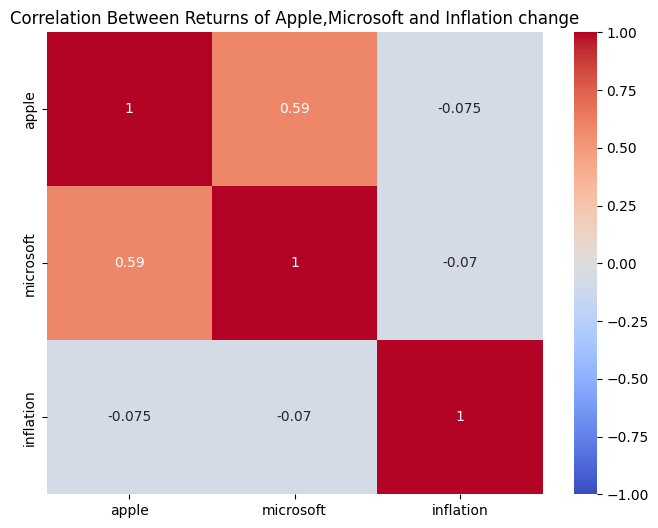

In [78]:
# Plot heatmap

plt.figure(figsize =(8,6))
sns.heatmap(
    corr,
    annot = True, # show correlation values
    cmap = "coolwarm", 
    vmin = -1, #minimum correlation valueß
    vmax = 1, # maximum correlation value 
)

plt.title("Correlation Between Returns of Apple,Microsoft and Inflation change")


## Calculating rolling volatility (standard deviation) of a stock's price for last 3 months

Volatility is a measure of the dispersion of returns for a given security. By calculating rolling volatility, investors can assess the risk associated with a stock over time: Higher volatility indicates higher risk, as the stock's price is more likely to experience significant fluctuations. In portfolio optimization, understanding the volatility of individual stocks and how it changes over time is crucial for diversification and optimization. By analyzing rolling volatility, investors can adjust their portfolios to maintain a desired risk level, potentially improving the risk-return profile.

One possible way to calculate volatility is by using the standard deviation of returns for a stock over time.

Your task:
* Calculate the weekly rolling standard deviation for Apple's closing price
* Plot the calculated rolling weekly volatility of Apple's closing price against Apple's closing price. Plot these **on the same chart, but using different y-axes**

Helpful hints:
* You'll need to use the `pandas` `rolling()` method with a given `window_size` parameter to make it a _weekly_ rolling calculation
* Use **only the last three months of data**; data much older than this may not be as useful for portfolio optimization
* You'll need to create two axes on the matplotlib figure to be able to use two different y-axes (one for the closing price and one for the rolling volatility calculated here)

In [79]:
# Define the window size for the rolling calculation (e.g., one week)

window_size = 5 # There is only 5 trading days (Monday to Friday)

In [80]:
# Calculate rolling one-week volatility
# from the returns of Close/Last price 
apple_3_mnths.loc[:,"5_day_rolling_std"] = (r_apple["Close/Last"].rolling(window = window_size).std()).loc[mask]


In [81]:
apple_3_mnths

,Close/Last,Volume,Open,High,Low,5_day_rolling_std
Date,,,,,,
2024-02-05,187.68,69668820,188.15,189.25,185.84,0.015513
2024-02-06,189.30,43490760,186.86,189.31,186.77,0.013633
2024-02-07,189.41,53438960,190.64,191.05,188.61,0.007636
2024-02-08,188.32,40962050,189.39,189.54,187.35,0.007444
2024-02-09,188.85,45155220,188.65,189.99,188.00,0.006342
...,...,...,...,...,...,...
2024-04-29,173.50,68169420,173.37,176.03,173.10,0.010497
2024-04-30,170.33,65934780,173.33,174.99,170.00,0.016292
2024-05-01,169.30,50383150,169.58,172.71,169.11,0.015996


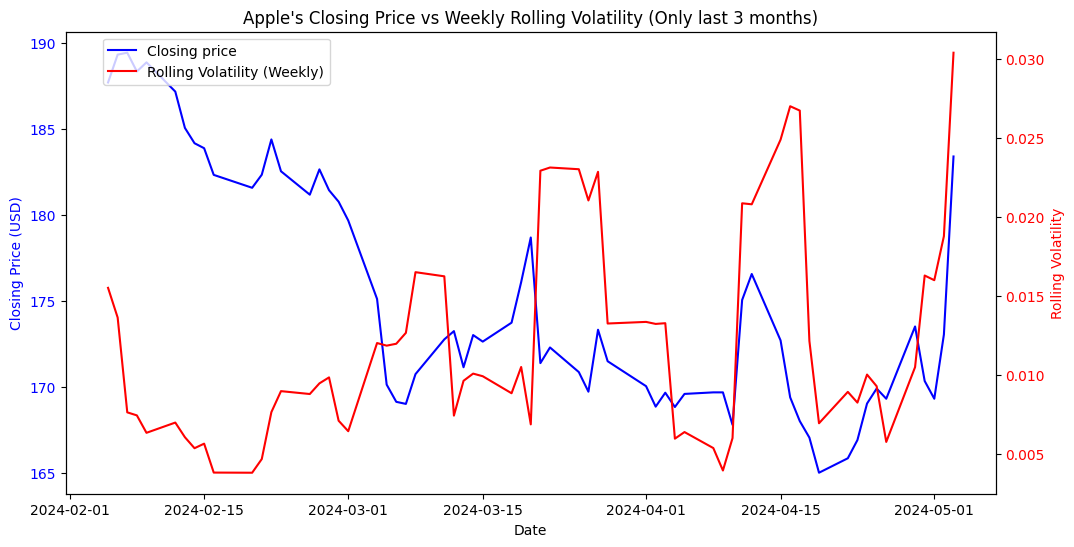

In [82]:
# Plot the calculated rolling weekly volatility of Apple's closing price against Apple's closing price
# Plot these on the same chart, but using different y-axes

# create figure and axis 
fig,ax1 = plt.subplots(figsize= (12,6))


# plot closing price on the primary axis 
ax1.plot(apple_3_mnths.index, apple_3_mnths["Close/Last"], color= "blue", label = "Closing price")
ax1.set_xlabel("Date")
ax1.set_ylabel("Closing Price (USD)", color = "blue")
ax1.tick_params(axis = 'y', labelcolor ="blue")


# create a secondary axis for rolling volatility 
ax2 = ax1.twinx()
ax2.plot(apple_3_mnths.index, apple_3_mnths["5_day_rolling_std"],
        color = "red", label = "Rolling Volatility (Weekly)")
ax2.set_ylabel("Rolling Volatility", color = "red")
ax2.tick_params(axis = "y", labelcolor = "red")

#title and legend 
plt.title("Apple's Closing Price vs Weekly Rolling Volatility (Only last 3 months)")
fig.legend(loc = "upper left", bbox_to_anchor = (0.15,0.88))



## Export data

Now that you have preprocessed your data, you should save it in new csv files so that it can be used in downstream tasks without having to redo all the preprocessing steps. 

Your task:
* Use `pandas` to export all modified datasets back to new CSV files

In [83]:
returns.to_csv("returns.csv")

In [84]:
apple_3_mnths.to_csv("apple_3_mnths.csv")

In [85]:
r_apple.to_csv("returns_apple.csv")


In [86]:
r_inflation.to_csv("returns_inflation.csv")

In [87]:
r_mst.to_csv("returns_microsoft.csv")

In [88]:
gdp.to_csv("gdp.csv")